# **04. Comparing Freematics, Arduino, C++ e Python**

## 1. Modules import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import seaborn as sns
from sklearn import preprocessing
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from random import randint, sample
import time

In [2]:
from teda import TEDA
from RLSFilter import RLSFilter

## 2. Data import

### 2.1 Freematics data

In [3]:
data = pd.read_csv("speed_1_8.csv", index_col=0)
data['x_atual'] = data['x_atual'].astype('float')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   y_pred             352 non-null    float64
 1   x_ant              352 non-null    float64
 2   x_atual            352 non-null    float64
 3   flag               352 non-null    int64  
 4   x_antp             352 non-null    float64
 5   x_atualp           352 non-null    float64
 6   acc_x              352 non-null    float64
 7   acc_y              352 non-null    float64
 8   acc_z              352 non-null    float64
 9   time_teda          352 non-null    int64  
 10  time_rls_filter_1  352 non-null    int64  
 11  time_rls_filter_2  352 non-null    int64  
 12  time_rls_update    352 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 38.5 KB


In [5]:
from scipy import stats

In [9]:
res_p = stats.normaltest(data['x_atual'])
res_p[1]

2.4632565131796763e-06

### In the Arduino simulation, the input dataset is declared as an array. Then, a loop is created to iterate over each data point for the application of the TEDA RLS algorithm.

### 2.2 Arduino data

In [5]:
data_arduino = pd.read_excel("arduino_data/speed_arduino_data.xlsx")
data['y_pred_ar'] = data_arduino['y_pred_ar']
data['flag_ar'] = data_arduino['flag']

### 2.3 C++ data
#### Check the C++ Repository [here](https://github.com/pedrohmeiraa).

In [6]:
y_pred_cpp = [0, 0, 0, 0, 0, 0, 0, 27.5554, 31.3926, 35.5511, 36.818, 38.4452, 40.2239, 40.8106, 40.2861, 42.3064, 43.1307, 45.1701, 47.2054, 48.0704, 48.9574, 51.0088, 53.0549, 53.9568, 54.8716, 54.6722, 54.4992, 54.3472, 54.2122, 54.0911, 52.8886, 50.6225, 48.3886, 49.4055, 49.3458, 48.2177, 48.1687, 48.1225, 50.2121, 52.2995, 53.3152, 53.2622, 53.2122, 51.039, 48.8816, 49.9062, 48.8168, 46.6798, 41.4061, 31.9978, 23.695, 21.6253, 19.5584, 23.6866, 28.8557, 34.0359, 38.1872, 42.3457, 45.4651, 47.5391, 49.6129, 51.6863, 53.759, 54.7796, 54.7487, 55.7687, 56.7881, 57.8066, 58.8245, 59.8416, 59.8086, 60.8254, 61.8416, 62.8571, 63.8719, 63.8382, 63.806, 63.775, 63.7454, 63.7169, 63.6894, 62.6208, 62.5968, 59.4548, 55.2889, 50.1065, 43.915, 35.6948, 26.4833, 20.3592, 20.3586, 23.417, 27.498, 31.583, 33.6262, 37.7179, 41.8147, 43.8625, 46.9388, 50.0177, 52.0686, 53.0888, 55.1402, 56.1598, 56.1471, 57.1663, 56.1218, 53.0194, 48.8975, 42.7375, 36.5972, 28.4348, 20.2944, 17.2463, 19.2773, 23.3414, 28.4262, 33.5173, 37.5952, 40.6562, 43.7197, 44.7384, 46.781, 48.8244, 49.8431, 50.8616, 50.8542, 50.8468, 51.8651, 51.8575, 51.8499, 50.8175, 48.7624, 42.6222, 32.4272, 23.2842, 19.2286, 19.2283, 22.2683, 27.3387, 31.3993, 34.4473, 36.4801, 40.5508, 44.6267, 48.7081, 50.7481, 51.7652, 51.7586, 52.7756, 55.8414, 57.8839, 59.927, 60.9436, 60.9328, 58.8698, 57.8357, 54.7556, 51.6823, 51.677, 50.6509, 47.5863, 43.5089, 37.4072, 29.2925, 23.2195, 19.1758, 18.1653, 19.1754, 19.1752, 21.1959, 26.2507, 31.3109, 36.3774, 41.4514, 44.4989, 46.5312, 47.5459, 50.5988, 52.6341, 55.6916, 57.7294, 58.7449, 58.7373, 57.7075, 55.6576, 53.611, 50.5486, 48.5089, 46.4718, 43.4213, 38.3469, 29.2351, 21.1558, 17.1218, 18.1298, 24.1805, 28.2182, 33.2704, 38.3292, 42.3814, 47.4543, 51.5184, 53.5507, 56.6035, 57.618, 59.6533, 58.6258, 58.6198, 58.6139, 58.6081, 56.5635, 51.4692, 45.3732, 38.2805, 32.2153, 23.1361, 23.2729, 19.1072, 24.1416, 31.1974, 37.2545, 42.31, 46.3599, 49.4004, 51.4281, 52.4408, 53.4536, 54.4665, 54.4628, 54.459, 55.4719, 57.5022, 57.4978, 56.4762, 53.423, 46.319, 38.2249, 29.1446, 20.0856, 18.075, 20.0853, 25.1133, 31.153, 35.1843, 39.2198, 43.2599, 46.2931, 48.3164, 51.3544, 53.3805, 56.4235, 57.436, 59.4656, 59.4612, 61.4916, 61.4868, 62.4999, 63.513, 63.5078, 63.5027, 63.4976, 63.4927, 63.4879, 62.466, 61.445, 59.4093, 58.3909, 57.3733, 57.3704, 57.3676, 57.3648, 56.3483, 50.27, 42.1869, 34.1244, 25.0736, 25.1474, 25.2214, 18.0453, 23.0627, 28.084, 32.1044, 37.1348, 42.1714, 45.1966, 48.2245, 50.2443, 53.2767, 55.2993, 56.31, 57.3208, 58.3318, 58.3292, 58.3266, 57.3106, 54.2705, 48.2026, 41.1401, 34.0931, 28.0631, 21.0376, 21.0753, 18.0295, 23.0426, 27.0559, 31.0722, 35.092, 37.1034, 39.1157, 41.1291, 43.1436, 44.151, 44.1502, 44.1495, 43.1407, 42.1323, 39.1101, 35.0847, 29.0547, 23.0332, 19.023, 19.023, 24.0349, 29.0511, 33.068, 37.0889, 40.1074, 42.1212, 43.1283, 44.1356, 45.1432, 44.1341, 43.1253, 41.1096, 37.0824, 33.0603, 32.0555, 31.051, 27.0353, 22.0207, 22.0414, 22.0622, 12.004, 12.0079, 12.0119, 16.0075, 19.0114, 21.0149, 22.017, 20.0128, 20.0257]
data['y_pred_cpp'] = y_pred_cpp
flag_cpp = [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1]
data['flag_cpp'] = flag_cpp

### 2.4 Python data

In [7]:
#TEDA
teda = TEDA(threshold=1.8)
FLAG = []

#RLS
filter_order = 2                    # Filter_order equivalent to window size
forgetting_factor = 0.99            # Forgetting factor: It is introduced to give exponentially less weight to older error samples. It is usually chosen between 0.98 and 1.
regularization_factor = 0.1         # It is usually chose between 0.1 and 1.
w0 = [0.0, 0.0]                     # Initial weights
X_ant = [0.0, 0.0]                  # Initial previous input
rls_filter = RLSFilter(n = filter_order, mu = forgetting_factor, delta=regularization_factor, w=w0) #Defining the filter instance
N_outlier_max = 2                   # Maximum of outliers corrected by TEDARLS
correction = True                   # Consecutive outlier correction flag

In [8]:
Ya_py = []          # Vector of auxiliary predicted values
Y_py = []           # Vector of predicted values
DB = []             # Vector of saved values (database)
outlier_count = 0   # Outlier count 
y_pred_py = 0.0     #Initial predicted value

In [9]:
for i in data['x_atual']:
    ## Acquiring the data input
    valor_atual = i

    #Checking if it is an outlier
    flag = teda.run(valor_atual)
    FLAG.append(flag)

    ## First Stage: Correcting outlier
    if (flag == 1):       
        outlier_count = outlier_count + 1
        valor_atual = y_pred_py
    else:
        outlier_count = 0
      
    #Evaluating the flood of outliers
    if(correction == True and outlier_count == N_outlier_max + 1):
        valor_atual = i
    
    #Saving 
    Ya_py.append(y_pred_py)

    # Updating weights
    rls_filter.update(valor_atual, np.array(X_ant))
    input_vector = []
    for j in X_ant[1:]:
        input_vector.append(j)
    input_vector.append(valor_atual)

    #Predicting the next value
    y_pred_py = rls_filter.filter(input_vector)
    Y_py.append(y_pred_py)

    # Second stage
    if (flag == 1):
        valor_atual = y_pred_py

    if(correction == True and outlier_count == N_outlier_max + 1):
        outlier_count = 0
        valor_atual = i
    DB.append(valor_atual)

    #Updating previous values vector
    X_ant = input_vector

data['flag_py'] = FLAG
data['save_py'] = DB
data['ya_pred_py'] = Ya_py
data['y_pred_py'] = Y_py

# 3. Results

### Creating a timestamp:

In [10]:
t_samples = np.linspace(0, len(data), num=len(data))

### Finding indices:

In [11]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

#### 1. Freematics:

In [12]:
numberOfOutliersFreematics = data['flag'].sum()
numberOfOutliersFreematics

12

In [13]:
outliersIndexFreematics = find_indices(data['flag'], 1)
outliersIndexFreematics

[4, 5, 217, 277, 278, 302, 341, 342, 343, 344, 345, 351]

#### 2. Arduino:

In [14]:
numberOfOutliersArduino = data['flag_ar'].sum()
numberOfOutliersArduino

12

In [15]:
outliersIndexArduino = find_indices(data['flag_ar'], 1)
outliersIndexArduino

[4, 5, 217, 277, 278, 302, 341, 342, 343, 344, 345, 351]

### 3. C++

In [16]:
numberOfOutliersCpp = data['flag_cpp'].sum()
numberOfOutliersCpp

12

In [17]:
outliersIndexCpp = find_indices(data['flag_cpp'], 1)
outliersIndexCpp

[4, 5, 217, 277, 278, 302, 341, 342, 343, 344, 345, 351]

### 4. Python

In [18]:
numberOfOutliersPython = data['flag_py'].sum()
numberOfOutliersPython

12

In [19]:
outliersIndexPython = find_indices(data['flag_py'], 1)
outliersIndexPython

[4, 5, 217, 277, 278, 302, 341, 342, 343, 344, 345, 351]

### Visualization

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


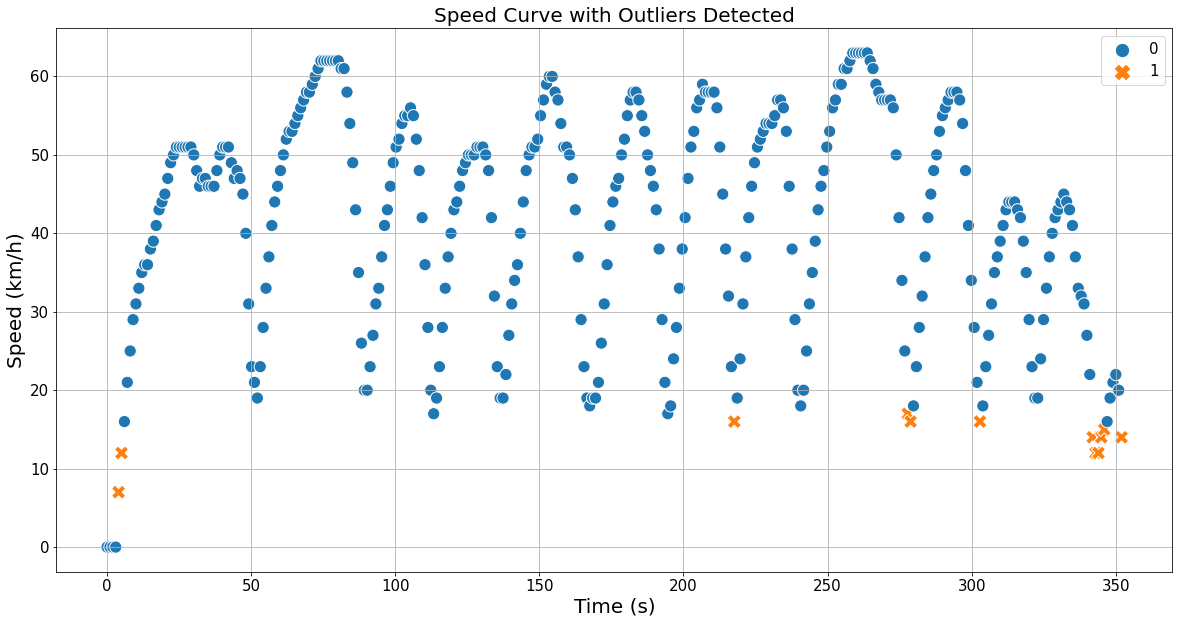

In [20]:
plt.figure(figsize=(20,10))
plt.grid()
plt.title("Speed Curve with Outliers Detected", fontsize=20)
sns.scatterplot(x=t_samples, y=data['x_atual'].values, hue=data['flag'], style=data['flag'], size=data['flag'], sizes=(200, 150))
plt.ylabel("Speed (km/h)", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# move the legend out of the plot
plt.legend(fontsize=15)
#plt.show()


plt.savefig("C:/Users/Samsung/Desktop/Pedro/UFRN/Portfolio/Publicados/TEDA RLS/Python/figures/Speed/results_speed_outliers_teda_1_8.eps", dpi=600, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


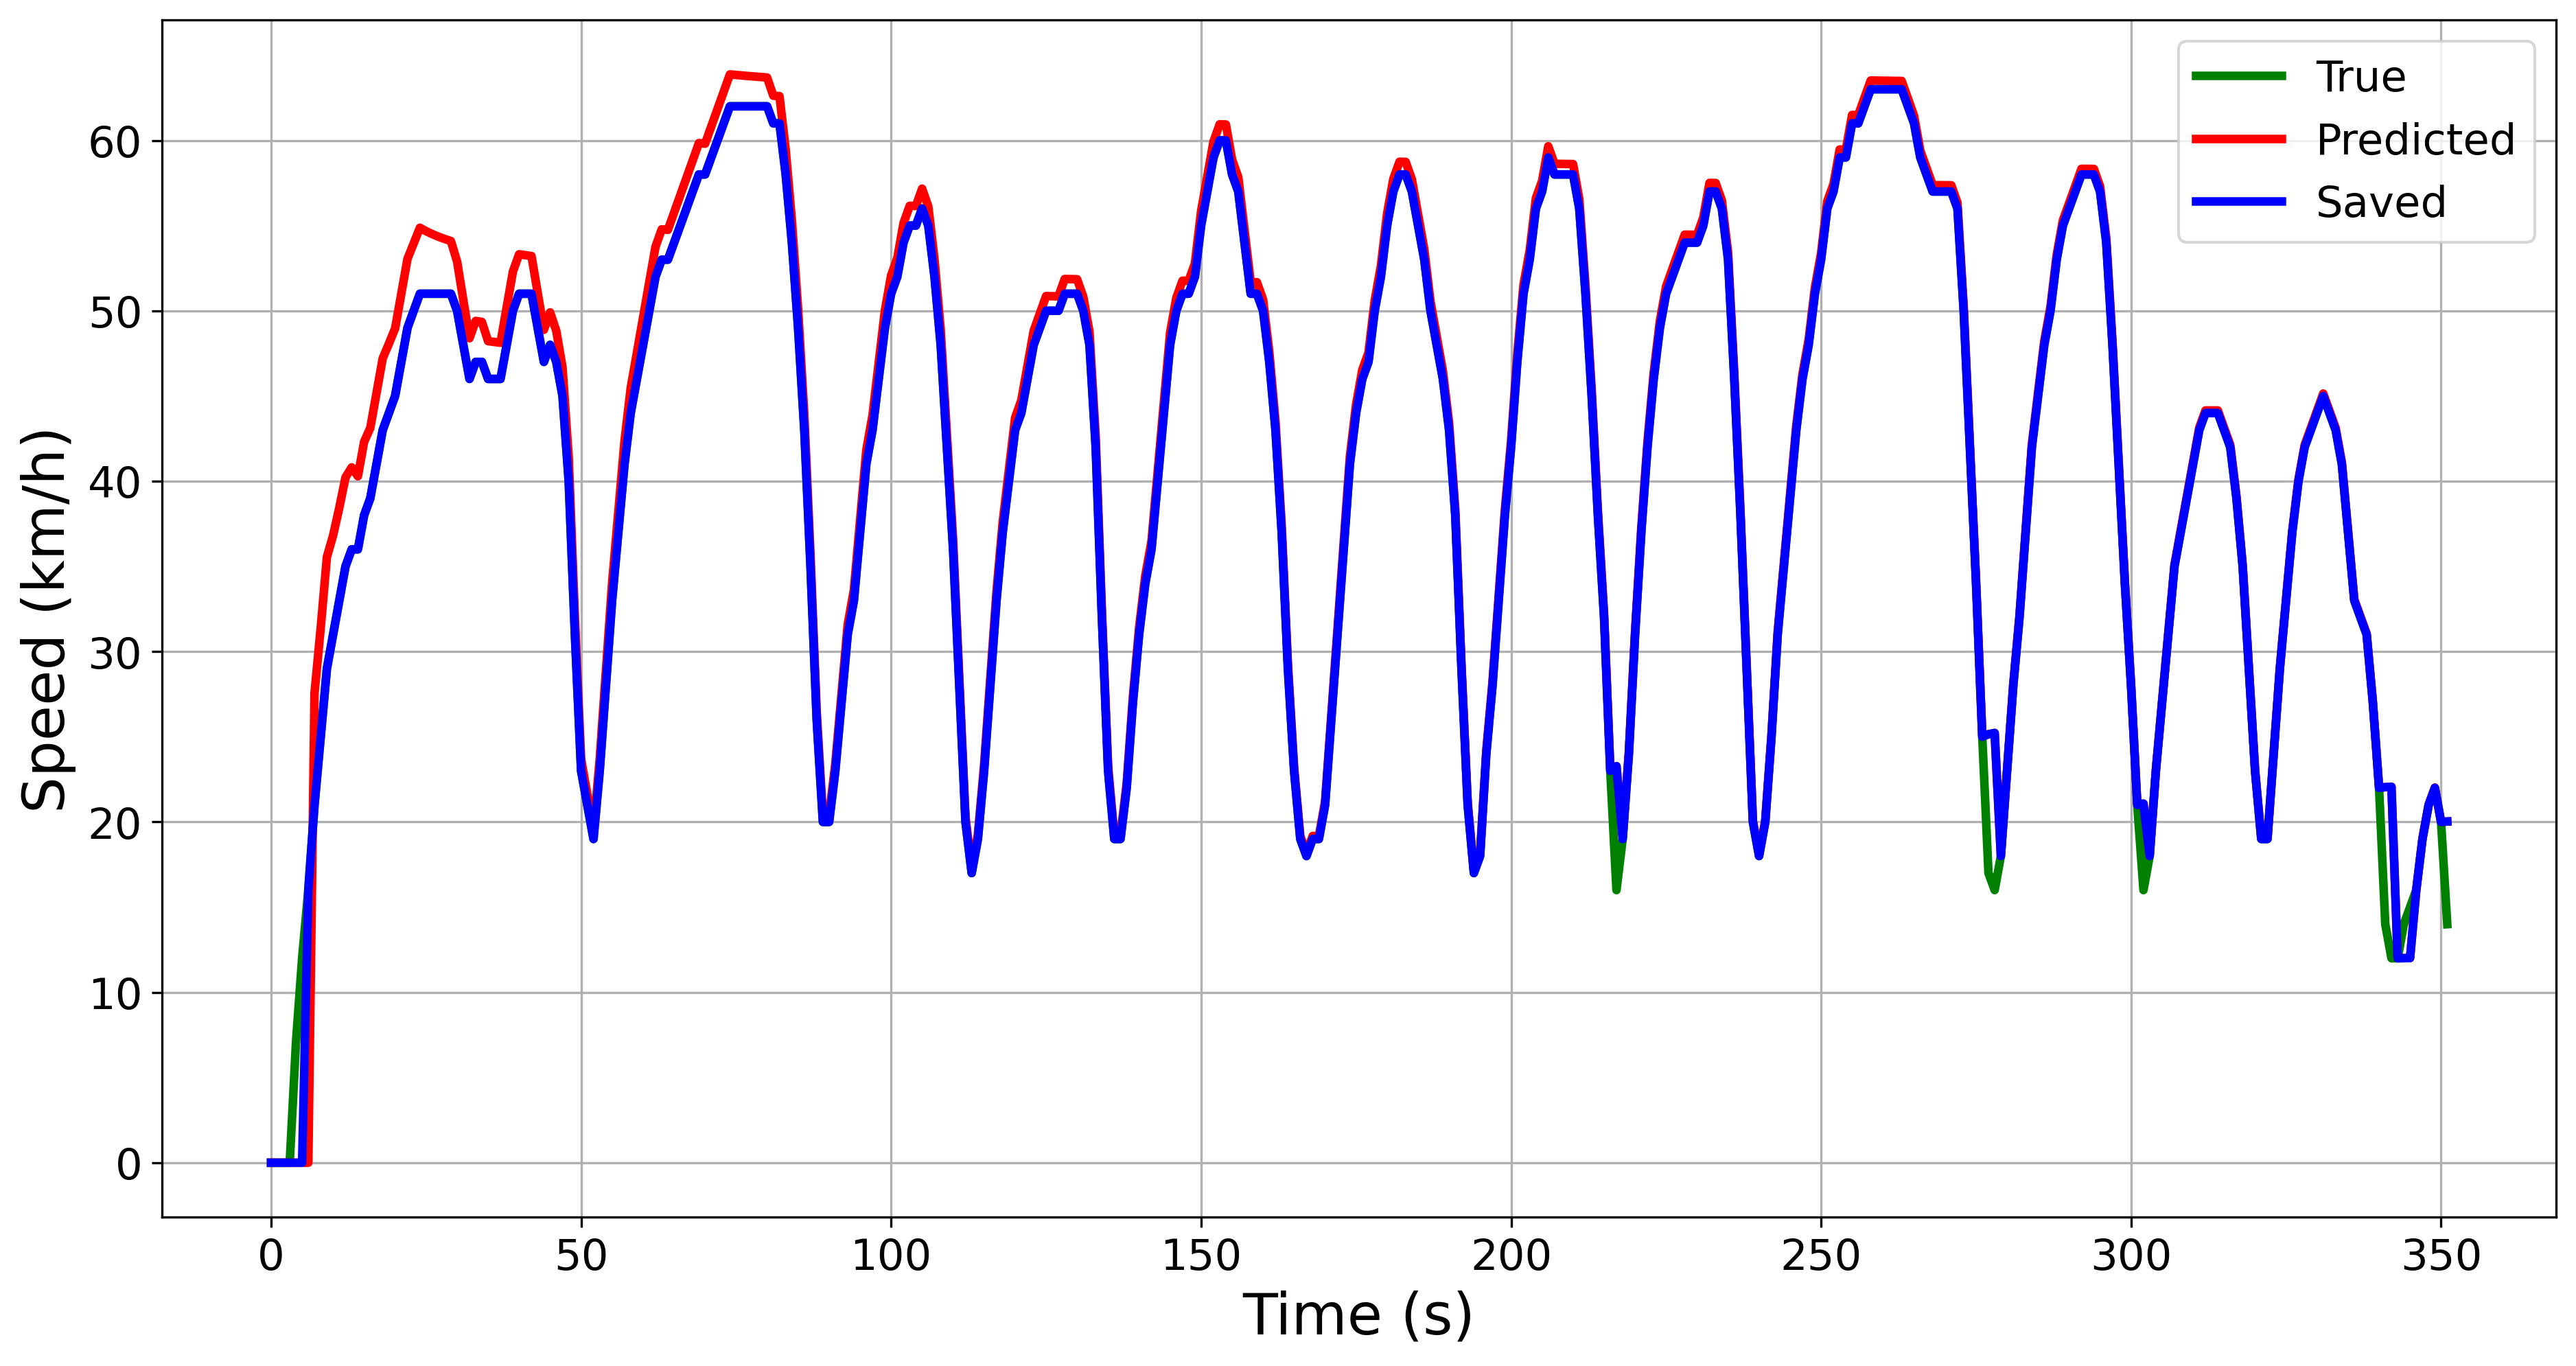

In [21]:
plt.figure(figsize=(15,7.7), dpi=300)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Speed (km/h)", fontsize=20)
plt.plot(data['x_atual'], 'g', label='True', linewidth=3)
plt.plot(data['y_pred'], 'r', label='Predicted', linewidth=3)
plt.plot(data['x_atualp'], 'b', label='Saved', linewidth=3)
plt.legend(fontsize=15)

plt.savefig("C:/Users/Samsung/Desktop/Pedro/UFRN/Portfolio/Publicados/TEDA RLS/Python/figures/Speed/results_speed_curves_teda_1_8.eps", dpi=600, bbox_inches='tight')

### Visualization

In [22]:
figure = make_subplots(specs=[[{"secondary_y": True}]])

figure.update_layout(
    title="Speed Dataset"
)


figure.add_trace(
    go.Scatter(y=data['x_atual'], name='True'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred'], name='Pred - Freeematics'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred_ar'], name='Pred - Arduino'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred_cpp'], name='Pred - Cpp'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred_py'], name='Pred - Python'),
    secondary_y=False
)

figure.update_xaxes(title='Time(s)')
figure.update_yaxes(title='Speed (m/s)', secondary_y=False)
figure.show()

## 3.1 RLS Metrics

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Calculating RMSE

In [24]:
rmse_freematics = mean_squared_error(data['x_atual'], data['y_pred'], squared=False)
rmse_arduino = mean_squared_error(data['x_atual'], data['y_pred_ar'], squared=False)
rmse_cpp = mean_squared_error(data['x_atual'], data['y_pred_cpp'], squared=False)
rmse_python = mean_squared_error(data['x_atual'], data['y_pred_py'], squared=False)
RMSE = [rmse_freematics, rmse_arduino, rmse_cpp, rmse_python]
label = ["Freematics", "Arduino", "Cpp", "Python"]


[Text(0, 0, '2.145'),
 Text(0, 0, '2.145'),
 Text(0, 0, '2.145'),
 Text(0, 0, '1.745')]

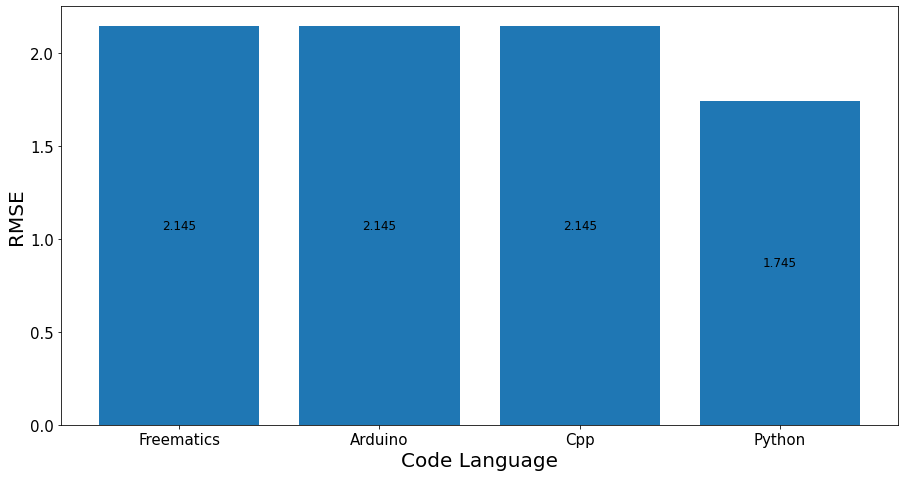

In [25]:
fig, ax = plt.subplots(figsize = (15,7.7))
p1 = ax.bar(label, RMSE)

plt.xlabel("Code Language", fontsize=20)
plt.ylabel("RMSE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.bar_label(p1, label_type='center', fmt='%.3f', fontsize=12)

#plt.savefig('', format='eps')#, bbox_inches='tight')

#### Calculating MAE

In [26]:
mae_freematics = mean_absolute_error(data['x_atual'], data['y_pred'])
mae_arduino = mean_absolute_error(data['x_atual'], data['y_pred_ar'])
mae_cpp = mean_absolute_error(data['x_atual'], data['y_pred_cpp'])
mae_python = mean_absolute_error(data['x_atual'], data['y_pred_py'])
MAE = [mae_freematics, mae_arduino, mae_cpp, mae_python]

[Text(0, 0, '1.132'),
 Text(0, 0, '1.132'),
 Text(0, 0, '1.132'),
 Text(0, 0, '0.831')]

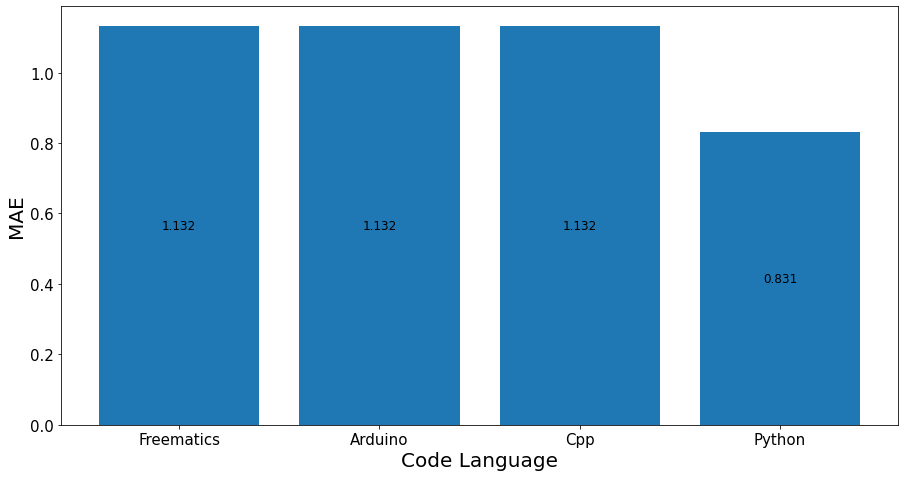

In [27]:
fig, ax = plt.subplots(figsize = (15,7.7))
p1 = ax.bar(label, MAE)

plt.xlabel("Code Language", fontsize=20)
plt.ylabel("MAE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.bar_label(p1, label_type='center', fmt='%.3f', fontsize=12)

#plt.savefig('', format='eps')#, bbox_inches='tight')

In [28]:
pd_results = pd.DataFrame({"Code":label,"RMSE": RMSE, "MAE": MAE})
pd_results.head()

,Code,RMSE,MAE
0,Freematics,2.145427,1.131717
1,Arduino,2.145210,1.131619
2,Cpp,2.145427,1.131716
3,Python,1.744951,0.831081


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


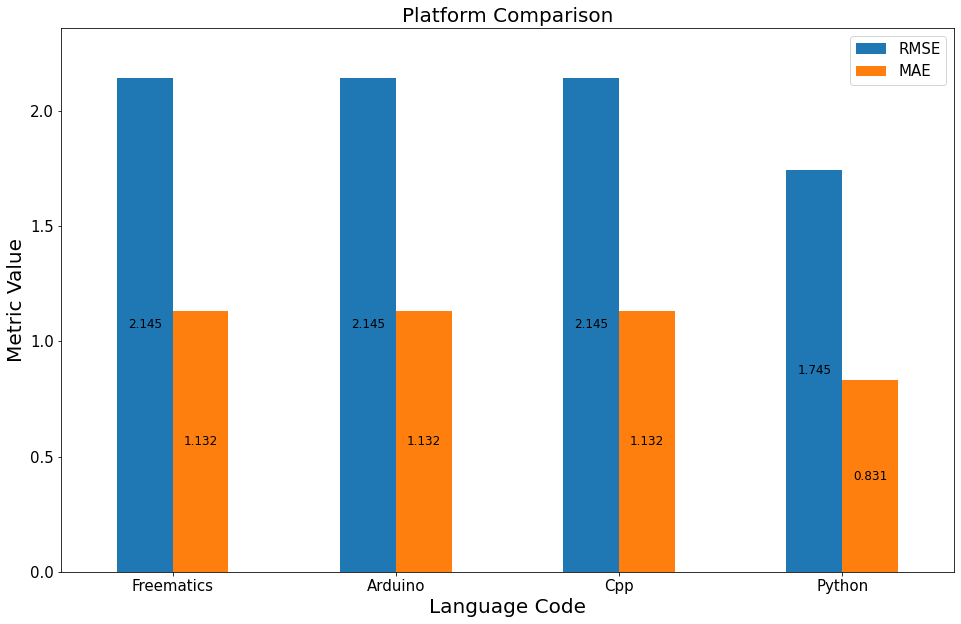

In [30]:
# plot bars or kind='barh' for horizontal bars; adjust figsize accordingly
ax = pd_results.plot(kind='bar', rot=0, xlabel='Code', ylabel='RMSE', figsize=(16, 10))

X_axis = np.arange(len(pd_results))

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.3f', label_type='center',fontsize=12)
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

plt.xticks(X_axis, pd_results['Code']) 

# move the legend out of the plot
ax.legend(fontsize=15)

plt.title("Platform Comparison", fontsize=20)
plt.xlabel("Language Code", fontsize=20)
plt.ylabel("Metric Value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.show()

plt.savefig("C:/Users/Samsung/Desktop/Pedro/UFRN/Portfolio/Publicados/TEDA RLS/Python/figures/Speed/results_platform_comparison.eps", dpi=600, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


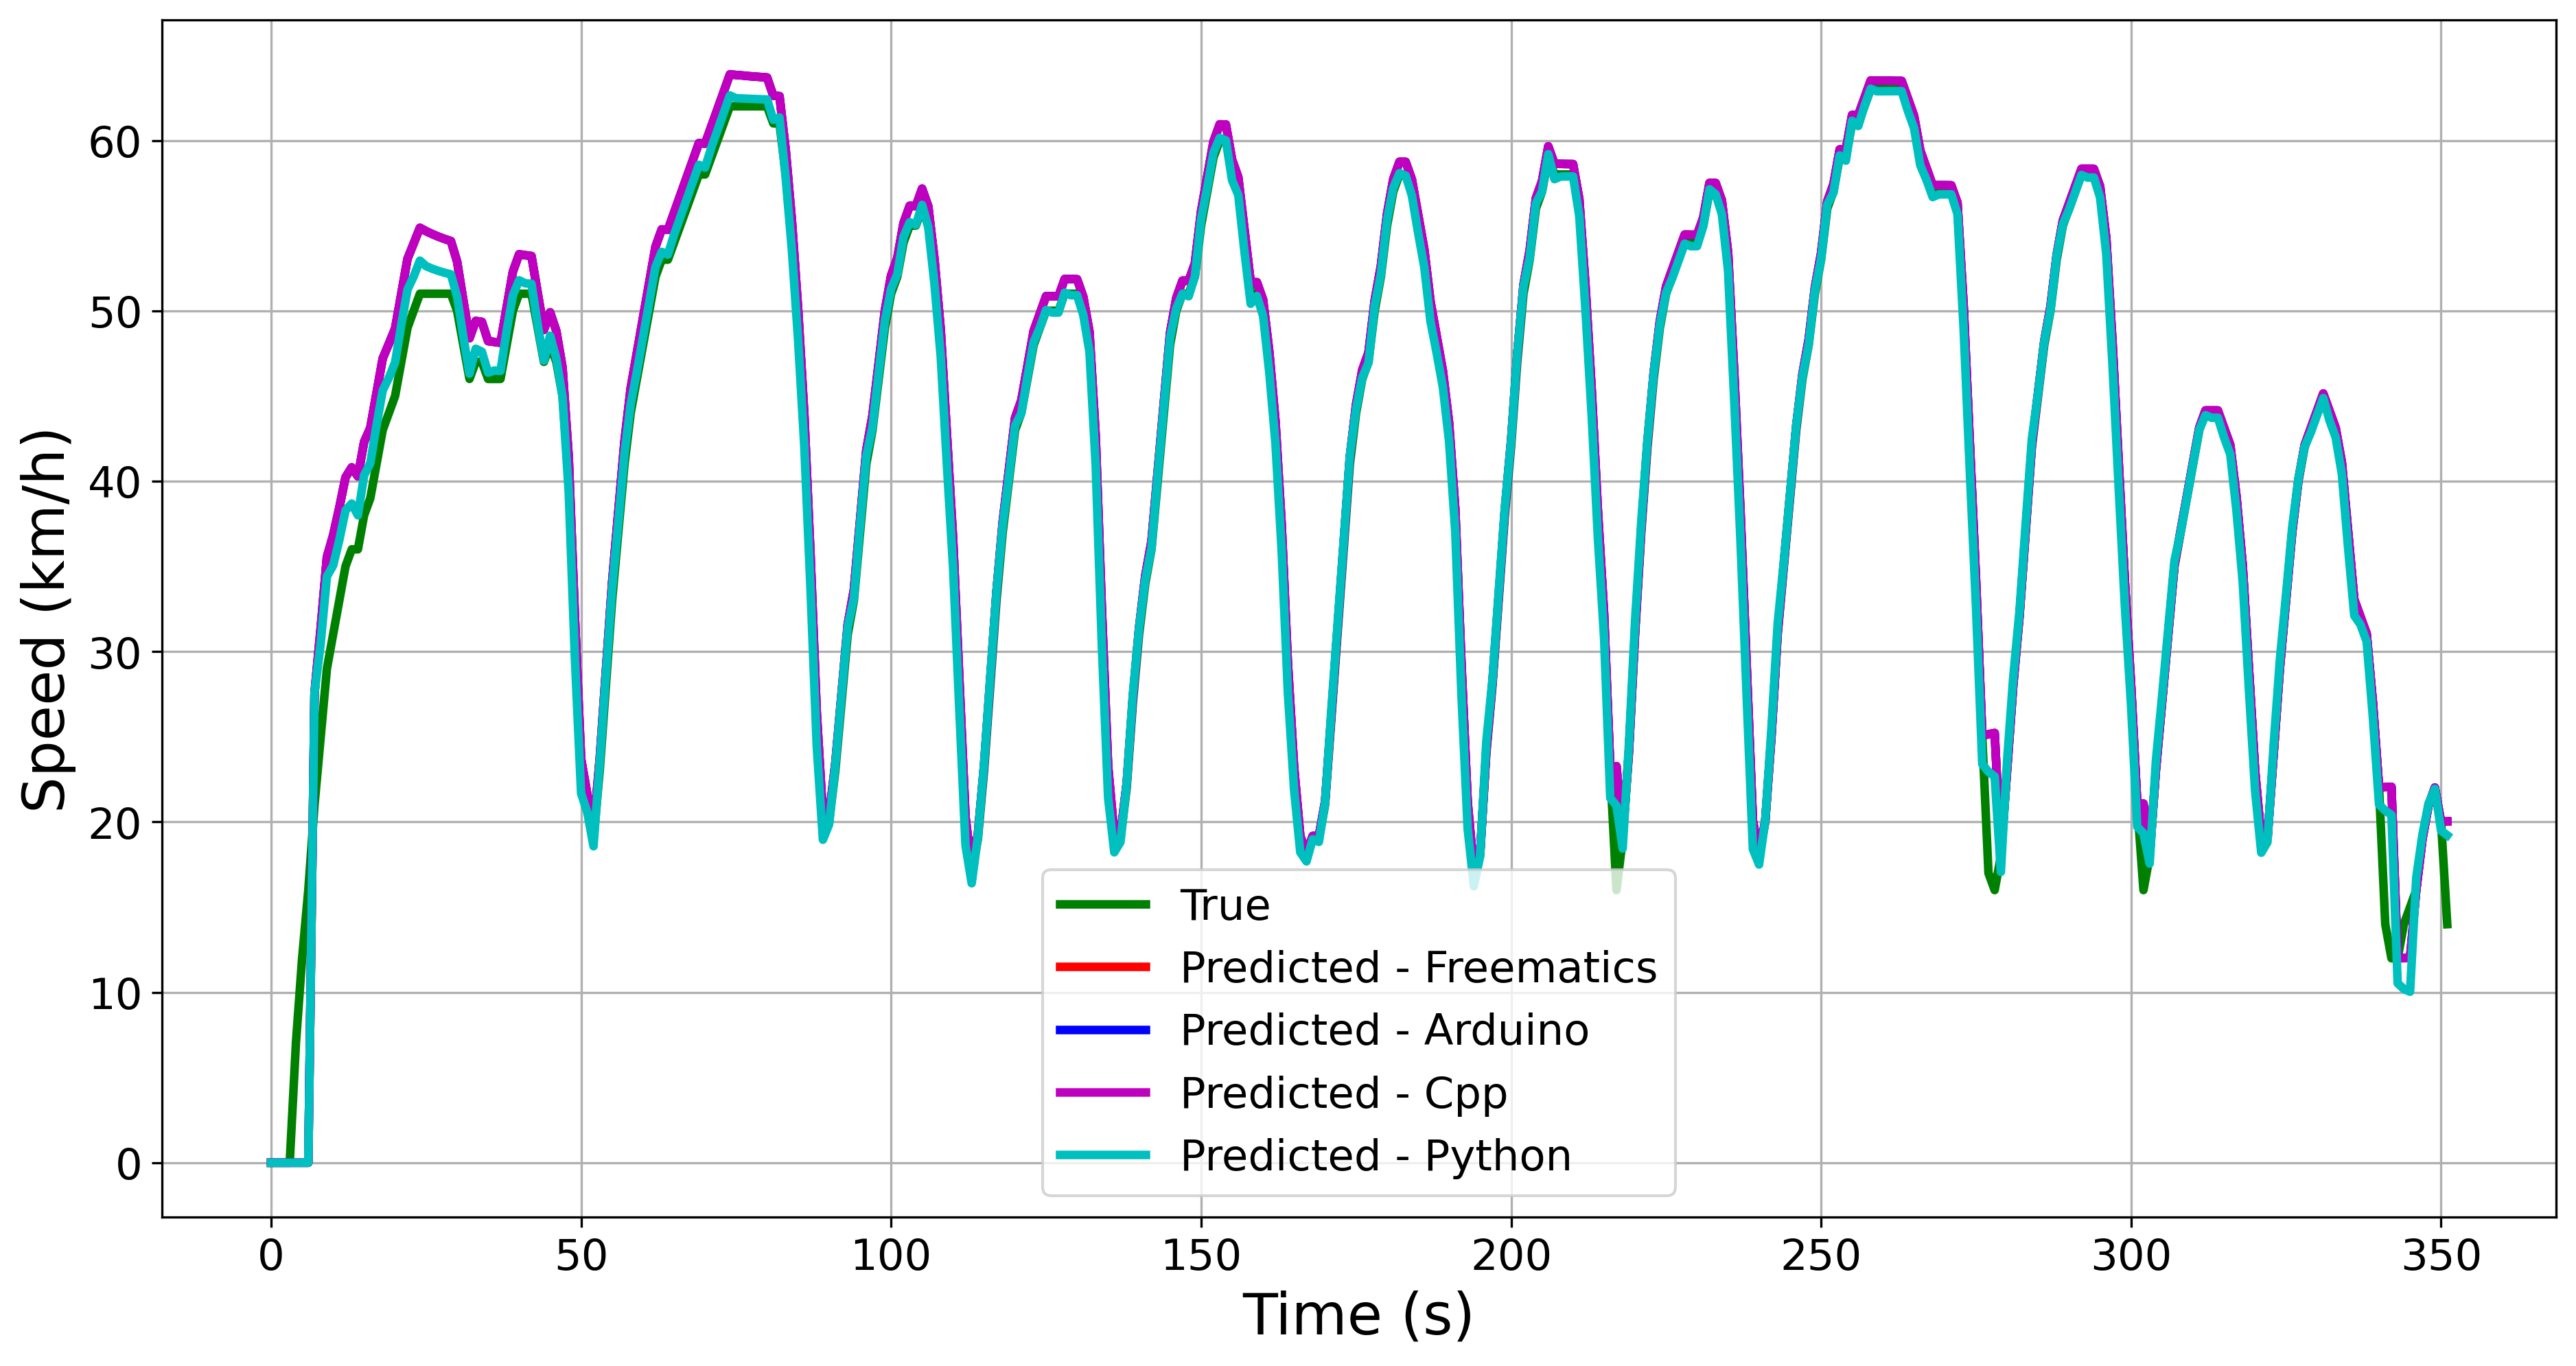

In [41]:
plt.figure(figsize=(15,7.7), dpi=300)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Speed (km/h)", fontsize=20)
plt.plot(data['x_atual'], 'g', label='True', linewidth=3)
plt.plot(data['y_pred'], 'r', label='Predicted - Freematics', linewidth=3)
plt.plot(data['y_pred_ar'], 'b', label='Predicted - Arduino', linewidth=3)
plt.plot(data['y_pred_cpp'], 'm', label='Predicted - Cpp', linewidth=3)
plt.plot(data['y_pred_py'], 'c', label='Predicted - Python', linewidth=3)
plt.legend(fontsize=15)

plt.savefig("C:/Users/Samsung/Desktop/Pedro/UFRN/Portfolio/Publicados/TEDA RLS/Python/figures/Speed/results_speed_comparison.eps", dpi=600, bbox_inches='tight')

# 4. Freematics Times Evaluation

#### The time wall is the overall duration of the algorithm, encompassing both the TEDA and RLS algorithms. The RLS time takes into account the two instances when the filter is utilized.

In [32]:
data['time_rls_filter'] = data['time_rls_filter_1'] + data['time_rls_filter_2']
data['time_rls'] = data['time_rls_filter_1'] + data['time_rls_filter_2'] + data['time_rls_update']
data['time_wall'] = data['time_teda'] + data['time_rls']

### 4.1 Visualization:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


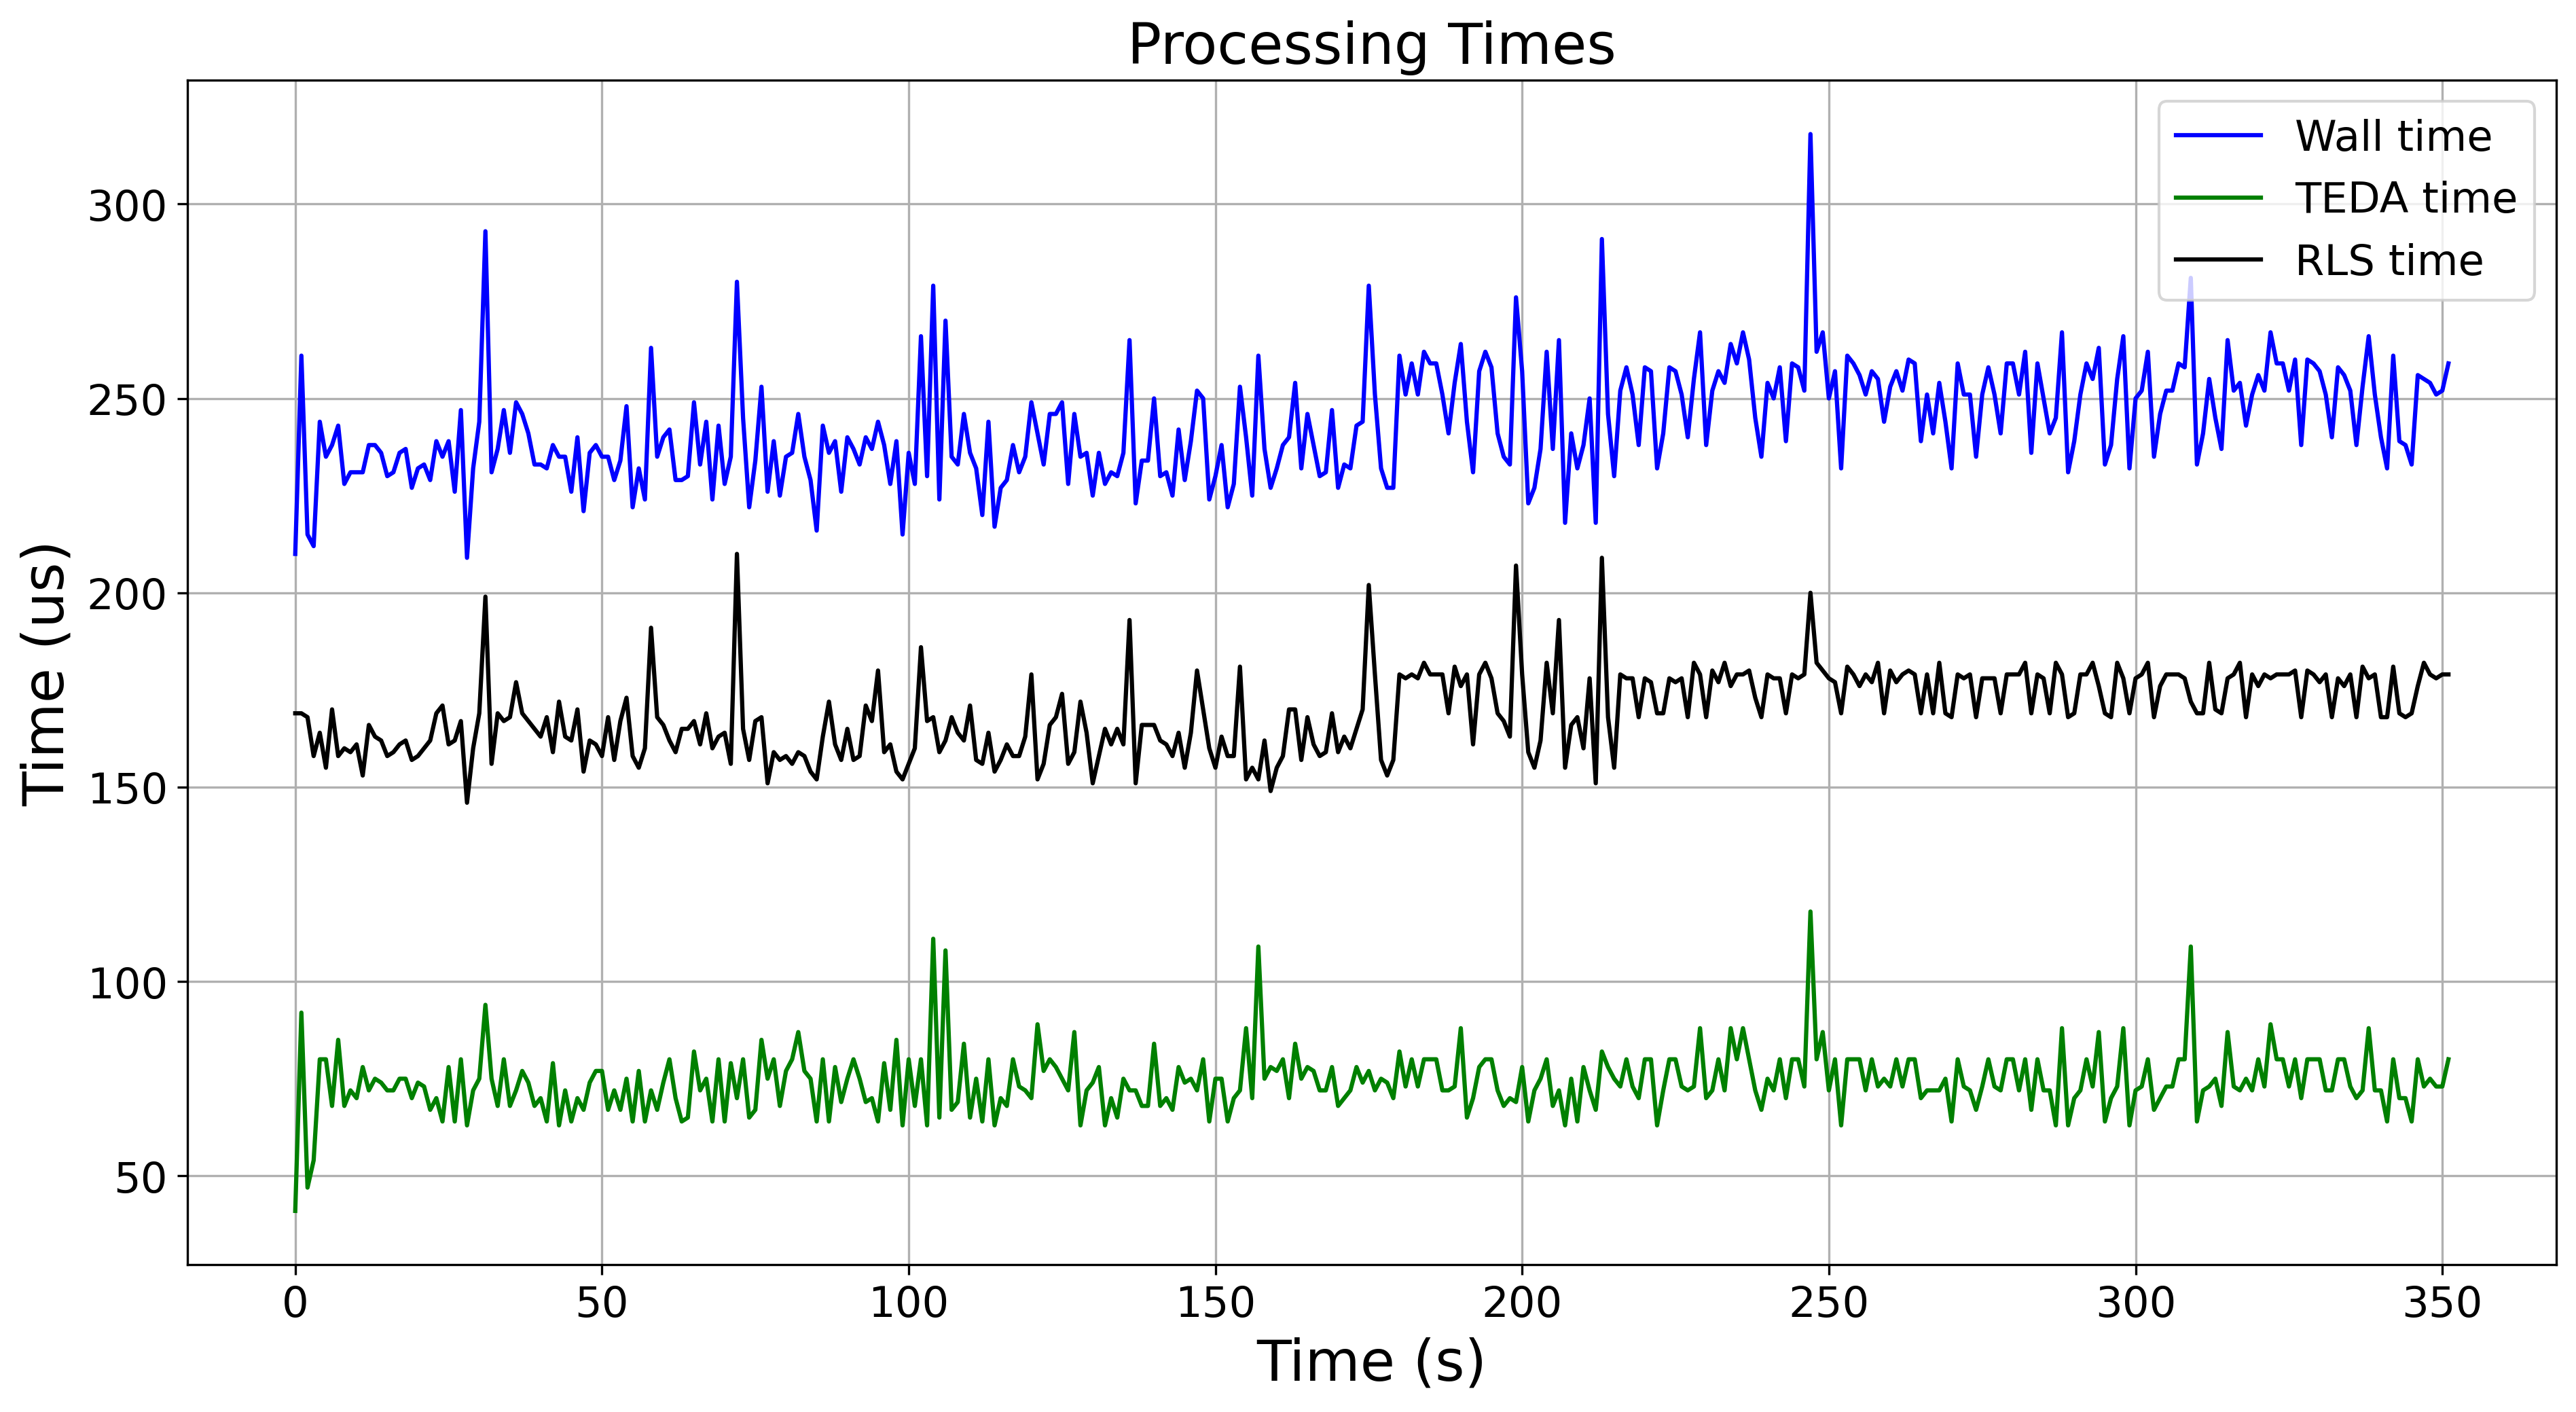

In [33]:
plt.figure(figsize=(15,7.7), dpi=300)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.title("Processing Times", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Time (us)", fontsize=20)
plt.plot(data['time_wall'], 'b', label='Wall time')
plt.plot(data['time_teda'], 'g', label='TEDA time')
plt.plot(data['time_rls'], 'k', label='RLS time')
plt.legend(fontsize=15)

plt.savefig("C:/Users/Samsung/Desktop/Pedro/UFRN/Portfolio/Publicados/TEDA RLS/Python/figures/Speed/results_speed_times.eps", dpi=600, bbox_inches='tight')

### 4.2 Mean and Standard Deviation

#### 4.2.1 TEDA Time

In [34]:
data['time_teda'].mean()

74.2528409090909

In [35]:
data['time_teda'].std()

8.039166439031284

#### 4.2.2 RLS Time

In [36]:
data['time_rls'].mean()

169.3806818181818

In [37]:
data['time_rls'].std()

10.371584652056216

#### 4.2.3 Wall Time

In [38]:
data['time_wall'].mean()

243.63352272727272

In [39]:
data['time_wall'].std()

14.322270072641077